# Confirmed COVID-19 Cases Comparison: Global

In [48]:
from urllib import request
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import scipy

plt.rcParams["figure.figsize"] = (20,10)

## The Data
#### We pull the data from John Hopkin's to better analyze and plot each respective country

In [49]:
url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"
data = pd.read_csv(url)
data.describe()

,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20
count,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,...,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000
mean,21.317326,22.168315,2.102273,2.477273,3.564394,5.431818,8.022727,11.087121,21.128788,23.356061,...,4151.200758,4535.636364,4818.617424,5095.079545,5401.878788,5723.878788,6042.992424,6408.026515,6710.280303,6994.996212
std,24.734994,70.669996,27.382118,27.480921,34.210982,47.612615,66.537101,89.647535,220.011922,221.352587,...,21667.237096,23940.073183,25670.348203,27466.891516,29364.316603,31408.470549,33419.461011,35633.968667,37520.876709,39320.047067
min,-51.796300,-135.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000
25%,6.969250,-20.026050,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,20.000000,20.750000,21.750000,24.000000,25.750000,27.750000,29.500000,32.000000,33.750000,33.750000
50%,23.488100,20.535638,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,183.000000,189.500000,208.500000,221.000000,232.500000,246.000000,254.500000,256.500000,265.500000,276.000000
75%,41.166075,78.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,943.000000,980.250000,1019.500000,1049.750000,1128.750000,1189.250000,1233.750000,1269.250000,1305.500000,1314.250000
max,71.706900,178.065000,444.000000,444.000000,549.000000,761.000000,1058.000000,1423.000000,3554.000000,3554.000000,...,275586.000000,308853.000000,337072.000000,366667.000000,396223.000000,429052.000000,461437.000000,496535.000000,526396.000000,555313.000000


In [50]:
def getCountry(country):
    CountryData = data[data['Country/Region']==country]
    return CountryData

In [51]:
def getValues(Data):
    DataValues = []
    for column in Data:
        if column=='Province/State':
            print("state column, ignoring")
            continue
        elif column=='Country/Region':
            print("country column, ignoring")
            continue
        elif column=='Lat':
            print("lat column, ignoring")
        elif column=='Long':
            print("long column, ignoring")
        else:
            item = int(Data[column])
            DataValues.append(item)
    #         print(item)
    return DataValues

In [52]:
ItalyData = getCountry('Italy')
ItalyValues = getValues(ItalyData)

state column, ignoring
country column, ignoring
lat column, ignoring
long column, ignoring


In [53]:
USData = getCountry('US')
USValues = getValues(USData)

state column, ignoring
country column, ignoring
lat column, ignoring
long column, ignoring


# Total Number of confirmed cases

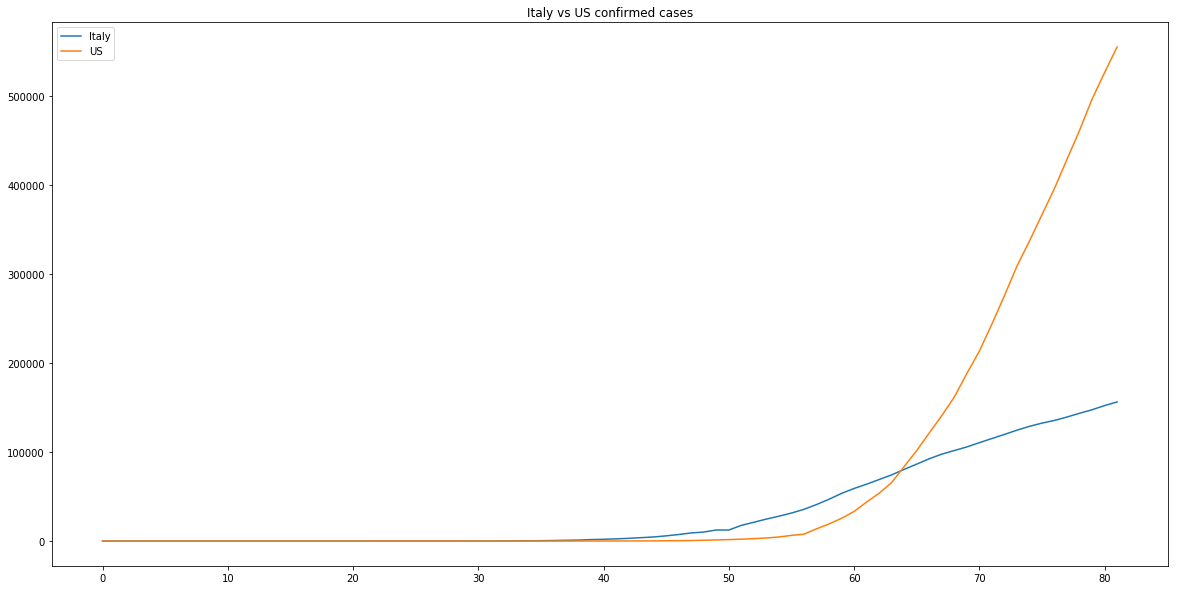

In [54]:
plt.title("Italy vs US confirmed cases")
plt.plot(ItalyValues, label="Italy")
plt.plot(USValues, label="US")
plt.legend()
plt.show()

#### The graph above illustrates the total number of confirmed cases for Italy and the US

# Percent of Population

In [55]:
italyPop = 60550075
usPop = 331000000

def countryPercent(DataValues, Pop):
    CountryPercent = []
    for d in DataValues:
        CountryPercent.append(d/Pop)
    return CountryPercent

In [56]:
ItalyPercent = countryPercent(ItalyValues, italyPop)
USPercent = countryPercent(USValues, usPop)

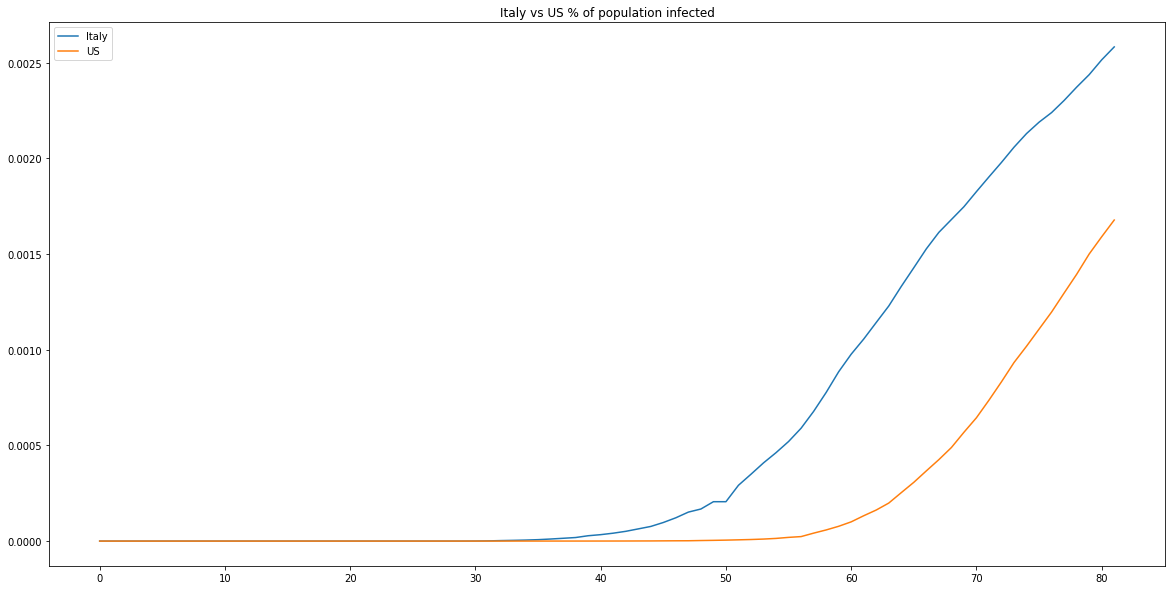

In [57]:
plt.title("Italy vs US % of population infected")
plt.plot(ItalyPercent, label="Italy")
plt.plot(USPercent, label="US")
plt.legend()
plt.show()

#### The graph above illustrates the percent of the total population infected, per country

# Linear Regression
#### I wanted to calculate the overall rate of the confirmed cases. I start out by applying a linear regression to the total number of confirmed cases per country

In [58]:
ItalyRegressor = LinearRegression()
count = 0
ItalyIndex = []
for x in ItalyValues:
    ItalyIndex.append(count)
    count = count+1
print(type(ItalyIndex))
print(type(ItalyValues))
ItalyRegressor.fit(np.array(ItalyIndex).reshape(-1,1), np.array(ItalyValues).reshape(-1,1))

<class 'list'>
<class 'list'>


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [59]:
USRegressor = LinearRegression()
count = 0
USIndex = []
for x in ItalyValues:
    USIndex.append(count)
    count = count+1
USRegressor.fit(np.array(USIndex).reshape(-1,1), np.array(USValues).reshape(-1,1))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [60]:
ItalyPrediction = ItalyRegressor.predict(np.array(ItalyIndex).reshape(-1,1))
USPrediction = USRegressor.predict(np.array(USIndex).reshape(-1,1))

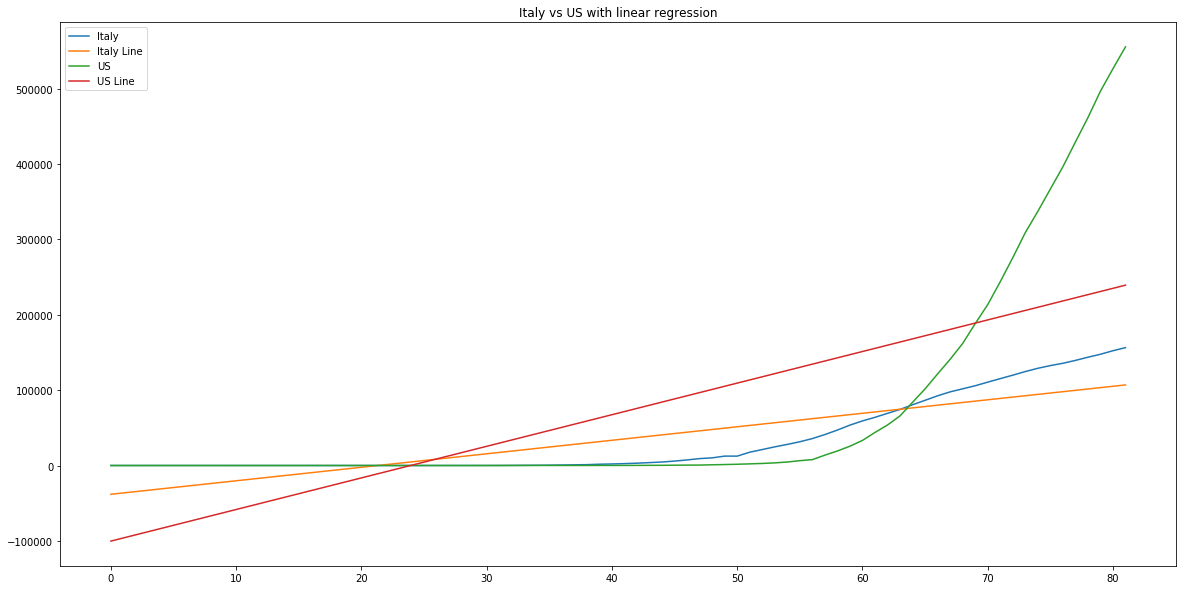

In [61]:
plt.title("Italy vs US with linear regression")
plt.plot(ItalyValues, label="Italy")
plt.plot(ItalyPrediction, label="Italy Line")
plt.plot(USValues, label="US")
plt.plot(USPrediction, label="US Line")
plt.legend()
plt.show()

In [62]:
print("Italy Intercept: ", ItalyRegressor.intercept_)
print("Italy Slope: ", ItalyRegressor.coef_)

print("US Intercept: ", USRegressor.intercept_)
print("US Slope: ", USRegressor.coef_)

Italy Intercept:  [-38159.11519248]
Italy Slope:  [[1790.65084185]]
US Intercept:  [-100269.15163091]
US Slope:  [[4191.41657143]]


#### The linear regressor calculated the overall growth rate for these confirmed cases.

# Ignore preceding zeroes
#### Let's ignore the preceding zeroes as they may detract from the overall rate of confirmed cases.

In [63]:
def removeZeroes(DataValues):
    # extra zeroes are bullshit
    DataNoZero = []
    DataNewIndex = []
    count = 0
    for i in DataValues:
        if i==0:
            continue
        else:
            DataNewIndex.append(count)
            DataNoZero.append(i)
            count = count + 1
    return DataNewIndex, DataNoZero

In [64]:
ItalyValueIndex, ItalyNoZero = removeZeroes(ItalyValues)
USValueIndex, USNoZero = removeZeroes(USValues)

In [65]:
USValueRegressor = LinearRegression()
USValueRegressor.fit(np.array(USValueIndex).reshape(-1,1), np.array(USNoZero).reshape(-1,1))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [66]:
ItalyValueRegressor = LinearRegression()
ItalyValueRegressor.fit(np.array(ItalyValueIndex).reshape(-1,1), np.array(ItalyNoZero).reshape(-1,1))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [67]:
ItalyNewPrediction = ItalyValueRegressor.predict(np.array(ItalyValueIndex).reshape(-1,1))
USNewPrediction = USValueRegressor.predict(np.array(USValueIndex).reshape(-1,1))

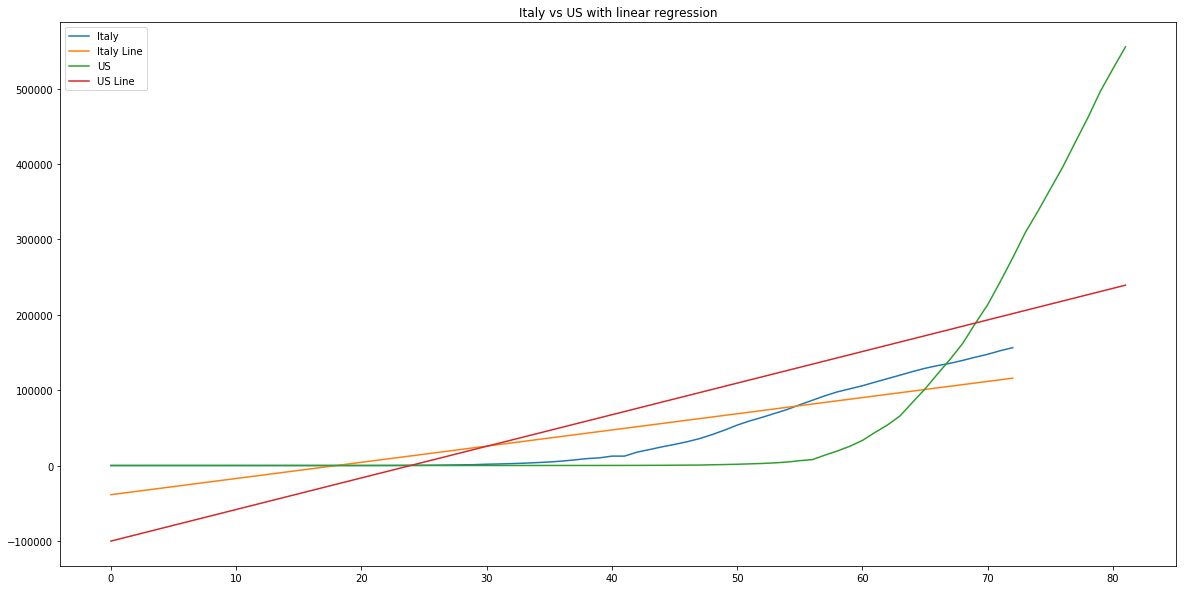

In [68]:
plt.title("Italy vs US with linear regression")
plt.plot(ItalyNoZero, label="Italy")
plt.plot(ItalyNewPrediction, label="Italy Line")
plt.plot(USNoZero, label="US")
plt.plot(USNewPrediction, label="US Line")
plt.legend()
plt.show()

In [69]:
print("Italy Intercept: ", ItalyValueRegressor.intercept_)
print("Italy Slope: ", ItalyValueRegressor.coef_)
print("US Intercept: ", USValueRegressor.intercept_)
print("US Slope: ", USValueRegressor.coef_)

Italy Intercept:  [-38687.94261385]
Italy Slope:  [[2146.85076515]]
US Intercept:  [-100269.15163091]
US Slope:  [[4191.41657143]]


#### We can see that values of the linear function did not drastically change.

# Percent of Population

In [70]:
ItalyPercentIndex, ItalyPercentClean = removeZeroes(ItalyPercent)
USPercentIndex, USPercentClean = removeZeroes(USPercent)

In [71]:
USPercentRegressor = LinearRegression()
USPercentRegressor.fit(np.array(USPercentIndex).reshape(-1,1), np.array(USPercentClean).reshape(-1,1))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [72]:
ItalyPercentRegressor = LinearRegression()
ItalyPercentRegressor.fit(np.array(ItalyPercentIndex).reshape(-1,1), np.array(ItalyPercentClean).reshape(-1,1))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [73]:
ItalyPercentPred = ItalyPercentRegressor.predict(np.array(ItalyPercentIndex).reshape(-1,1))
USPercentPred = USPercentRegressor.predict(np.array(USPercentIndex).reshape(-1,1))

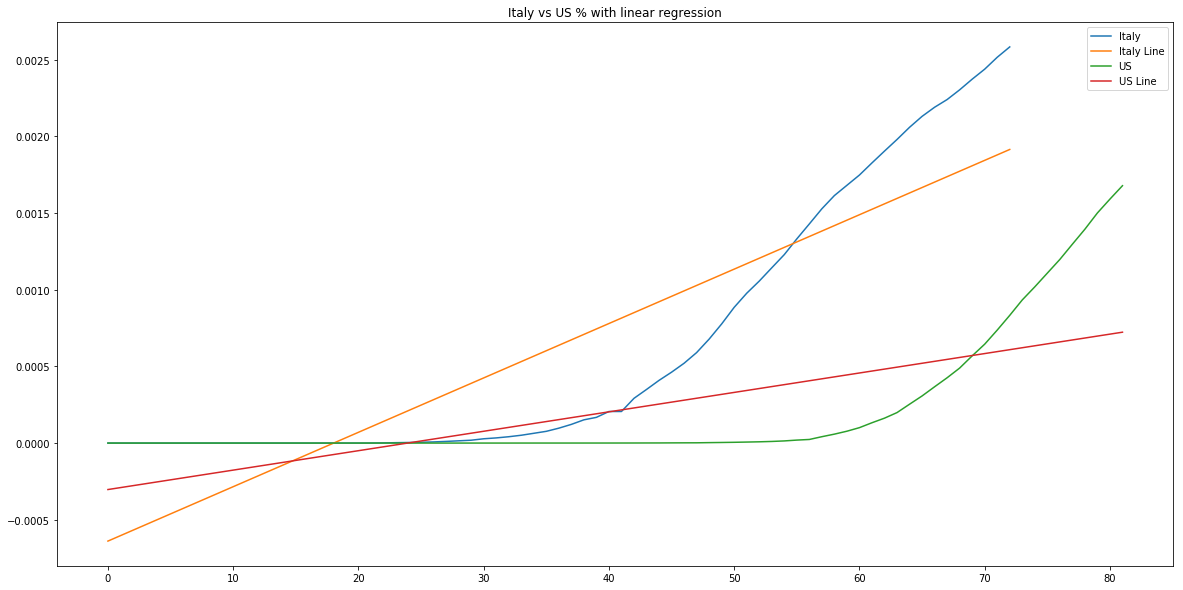

In [74]:
plt.title("Italy vs US % with linear regression")
plt.plot(ItalyPercentClean, label="Italy")
plt.plot(ItalyPercentPred, label="Italy Line")
plt.plot(USPercentClean, label="US")
plt.plot(USPercentPred, label="US Line")
plt.legend()
plt.show()

In [75]:
print("Italy percent intercept: ", ItalyPercentRegressor.intercept_)
print("Italy percent slope: ", ItalyPercentRegressor.coef_)
print("US percent intercept: ", USPercentRegressor.intercept_)
print("US percent slope: ", USPercentRegressor.coef_)

Italy percent intercept:  [-0.00063894]
Italy percent slope:  [[3.54557904e-05]]
US percent intercept:  [-0.00030293]
US percent slope:  [[1.26628899e-05]]


#### We have imposed a linear regression over the rate of the percentage of the confirmed cases of the population.

# Rate of confirmed cases
#### Let's calculate the daily difference of the confirmed cases to illustrate the overall trend.

In [76]:
def difference(DataValues):
    DataDifference = DataValues.copy()
    for i in range(len(DataDifference) -1, 0, -1):
        DataDifference[i] = DataDifference[i] - DataDifference[i-1]
    DataDifference[0] = 0
    return DataDifference

In [77]:
ItalyDifference = difference(ItalyNoZero)
USDifference = difference(USNoZero)

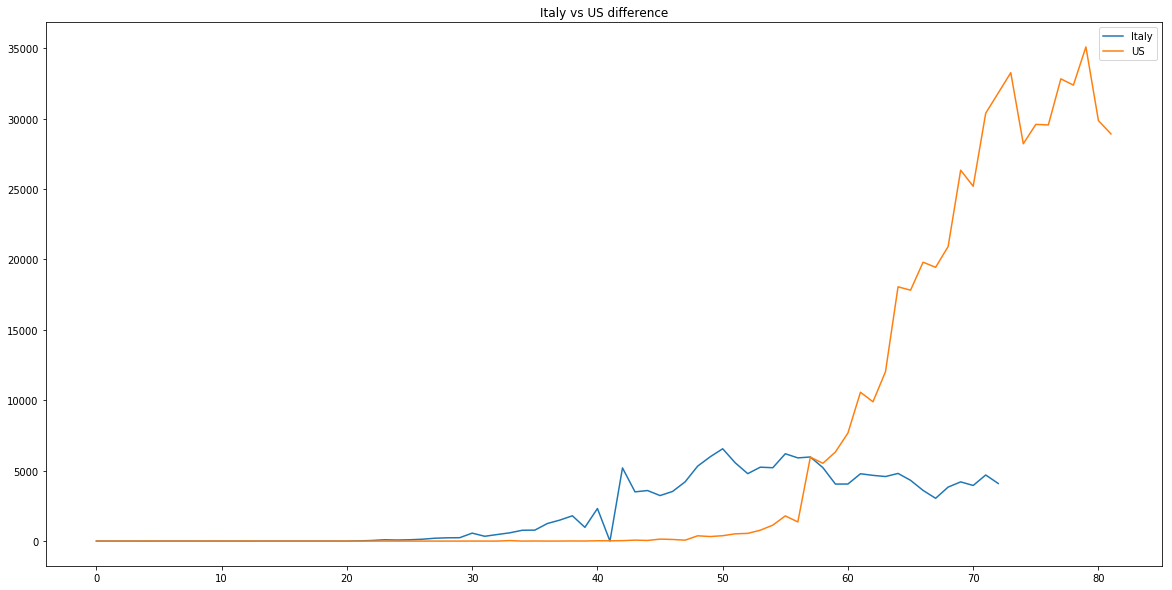

In [78]:
plt.title("Italy vs US difference")
plt.plot(ItalyDifference, label="Italy")
plt.plot(USDifference, label="US")
plt.legend()
plt.show()

In [79]:
ItalyGrowthRegressor = LinearRegression()
ItalyGrowthRegressor.fit(np.array(ItalyValueIndex[35:55]).reshape(-1,1), np.array(ItalyDifference[35:55]).reshape(-1,1))

USGrowthRegressor = LinearRegression()
USGrowthRegressor.fit(np.array(USValueIndex[55:]).reshape(-1,1), np.array(USDifference[55:]).reshape(-1,1))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [80]:
ItalyGrowthPred = ItalyGrowthRegressor.predict(np.array(ItalyValueIndex[35:55]).reshape(-1,1))
USGrowthPred = USGrowthRegressor.predict(np.array(USValueIndex[55:]).reshape(-1,1))

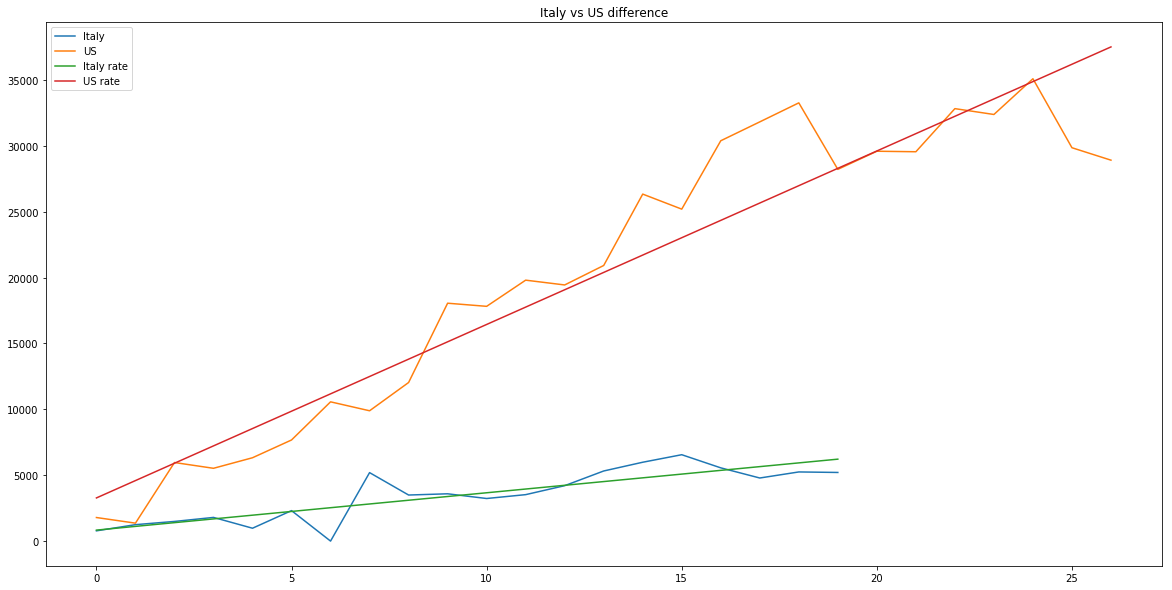

In [81]:
plt.title("Italy vs US difference")
plt.plot(ItalyDifference[35:55], label="Italy")
plt.plot(USDifference[55:], label="US")
plt.plot(ItalyGrowthPred, label="Italy rate")
plt.plot(USGrowthPred, label="US rate")
plt.legend()
plt.show()

In [82]:
print("Italy Intercept: ", ItalyGrowthRegressor.intercept_)
print("Italy Slope: ", ItalyGrowthRegressor.coef_)
print("US Intercept: ", USGrowthRegressor.intercept_)
print("US Slope: ", USGrowthRegressor.coef_)

Italy Intercept:  [-9090.25338346]
Italy Slope:  [[283.52030075]]
US Intercept:  [-69149.98738299]
US Slope:  [[1316.84676435]]


#### After imposing a linear regression onto the differenced data, we can see that the overall rate for the US is drastically increasing compared to the rate of Italy.

In [83]:
# Spain
SpainData = getCountry('Spain')
SpainValues = getValues(SpainData)

SpainIndex, SpainNoZero = removeZeroes(SpainValues)
SpainDifference = difference(SpainNoZero)

state column, ignoring
country column, ignoring
lat column, ignoring
long column, ignoring


In [84]:
# Spain
GermanyData = getCountry('Germany')
GermanyValues = getValues(GermanyData)

GermanyIndex, GermanyNoZero = removeZeroes(GermanyValues)
GermanyDifference = difference(GermanyNoZero)

state column, ignoring
country column, ignoring
lat column, ignoring
long column, ignoring


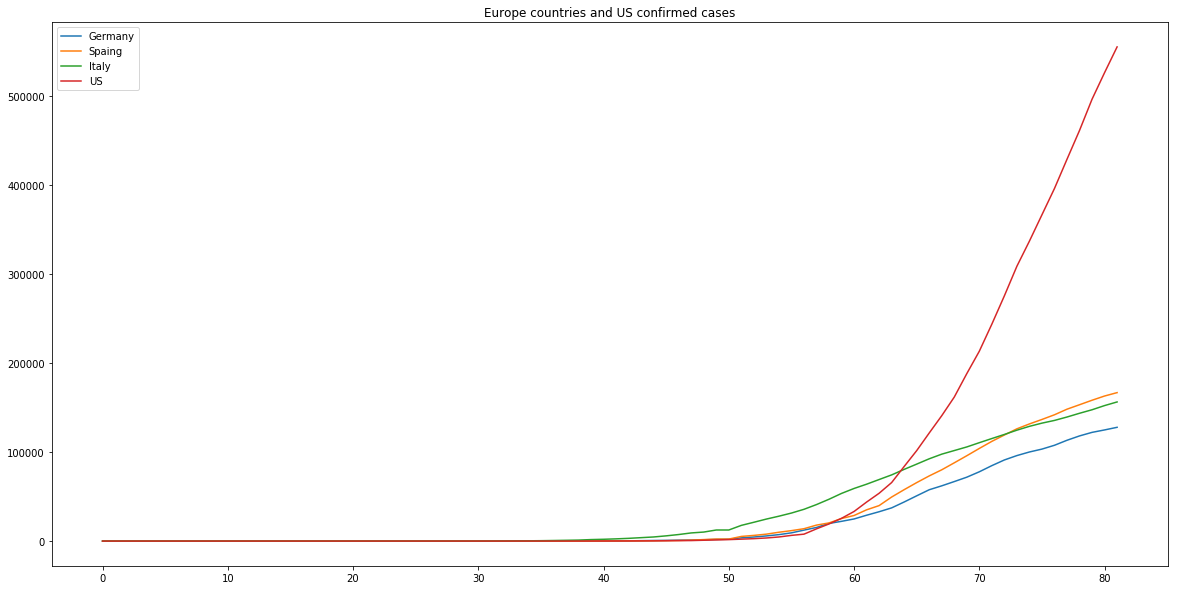

In [85]:
plt.title("Europe countries and US confirmed cases")
plt.plot(GermanyValues, label="Germany")
plt.plot(SpainValues, label="Spaing")
plt.plot(ItalyValues, label="Italy")
plt.plot(USValues, label="US")
plt.legend()
plt.show()

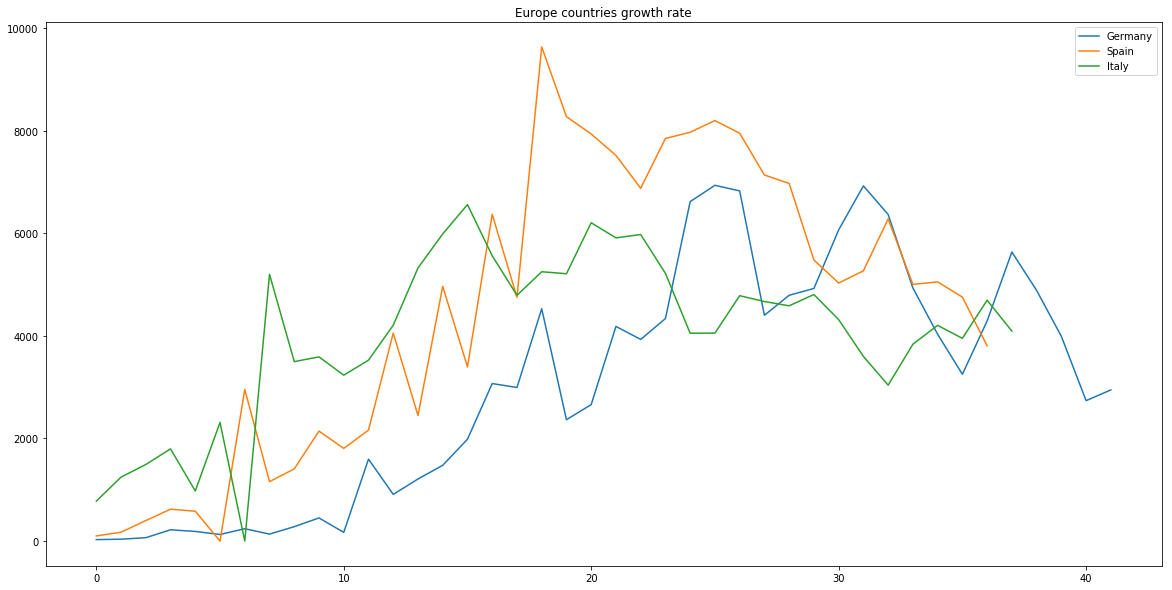

In [86]:
plt.title("Europe countries growth rate")
plt.plot(GermanyDifference[35:], label="Germany")
plt.plot(SpainDifference[35:], label="Spain")
plt.plot(ItalyDifference[35:], label="Italy")
plt.legend()
plt.show()

#### These 3 European countries seem to illustrate similar patterns regarding the rate of confirmed cases.

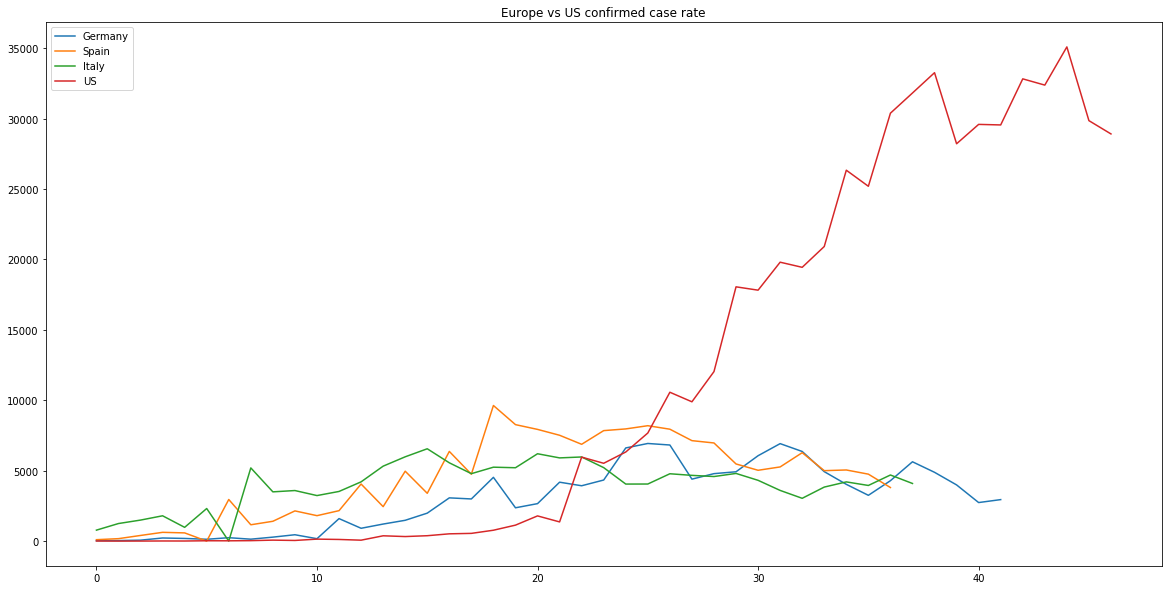

In [87]:
plt.title("Europe vs US confirmed case rate")
plt.plot(GermanyDifference[35:], label="Germany")
plt.plot(SpainDifference[35:], label="Spain")
plt.plot(ItalyDifference[35:], label="Italy")
plt.plot(USDifference[35:], label="US")
plt.legend()
plt.show()

#### On the other hand, the US's rate of confirmed cases is rapidly increasing compared to these 3 European countries

## Other methods to explore
- group by latitude
- 7 day moving average

# Death Rate

In [88]:
url_death = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv"
death = pd.read_csv(url_death)
death.describe()

,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20
count,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,...,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000
mean,21.317326,22.168315,0.064394,0.068182,0.098485,0.159091,0.212121,0.310606,0.496212,0.503788,...,222.678030,244.719697,262.780303,282.443182,310.094697,334.613636,361.571970,388.352273,410.996212,432.162879
std,24.734994,70.669996,1.046278,1.047853,1.479183,2.462894,3.201783,4.678456,7.693263,7.693757,...,1323.622793,1432.168421,1521.482461,1620.151924,1757.472055,1881.696578,2019.835839,2162.976556,2289.544937,2399.502564
min,-51.796300,-135.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.969250,-20.026050,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.750000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,23.488100,20.535638,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.000000,2.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.500000,4.000000,4.000000
75%,41.166075,78.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,13.000000,16.250000,18.000000,19.000000,21.250000,22.000000,23.000000,24.000000,24.250000,25.250000
max,71.706900,178.065000,17.000000,17.000000,24.000000,40.000000,52.000000,76.000000,125.000000,125.000000,...,14681.000000,15362.000000,15887.000000,16523.000000,17127.000000,17669.000000,18279.000000,18849.000000,20463.000000,22020.000000


In [89]:
def getCountryDeath(country):
    CountryData = death[data['Country/Region']==country]
    return CountryData

In [90]:
USDeath = getCountryDeath("US")
USDeathValues = getValues(USDeath)

USIndex, USDeathNoZero = removeZeroes(USDeathValues)
USDeathDiff = difference(USDeathNoZero)

state column, ignoring
country column, ignoring
lat column, ignoring
long column, ignoring


In [91]:
ItalyDeath = getCountryDeath("Italy")
ItalyDeathValues = getValues(ItalyDeath)

ItalyIndex, ItalyDeathNoZero = removeZeroes(ItalyDeathValues)
ItalyDeathDiff = difference(ItalyDeathNoZero)

state column, ignoring
country column, ignoring
lat column, ignoring
long column, ignoring


In [92]:
GermanyDeath = getCountryDeath("Germany")
GermanyDeathValues = getValues(GermanyDeath)

GermanyIndex, GermanyDeathNoZero = removeZeroes(GermanyDeathValues)
GermanyDeathDiff = difference(GermanyDeathNoZero)

state column, ignoring
country column, ignoring
lat column, ignoring
long column, ignoring


In [93]:
SpainDeath = getCountryDeath("Spain")
SpainDeathValues = getValues(SpainDeath)

SpainIndex, SpainDeathNoZero = removeZeroes(SpainDeathValues)
SpainDeathDiff = difference(SpainDeathNoZero)

state column, ignoring
country column, ignoring
lat column, ignoring
long column, ignoring


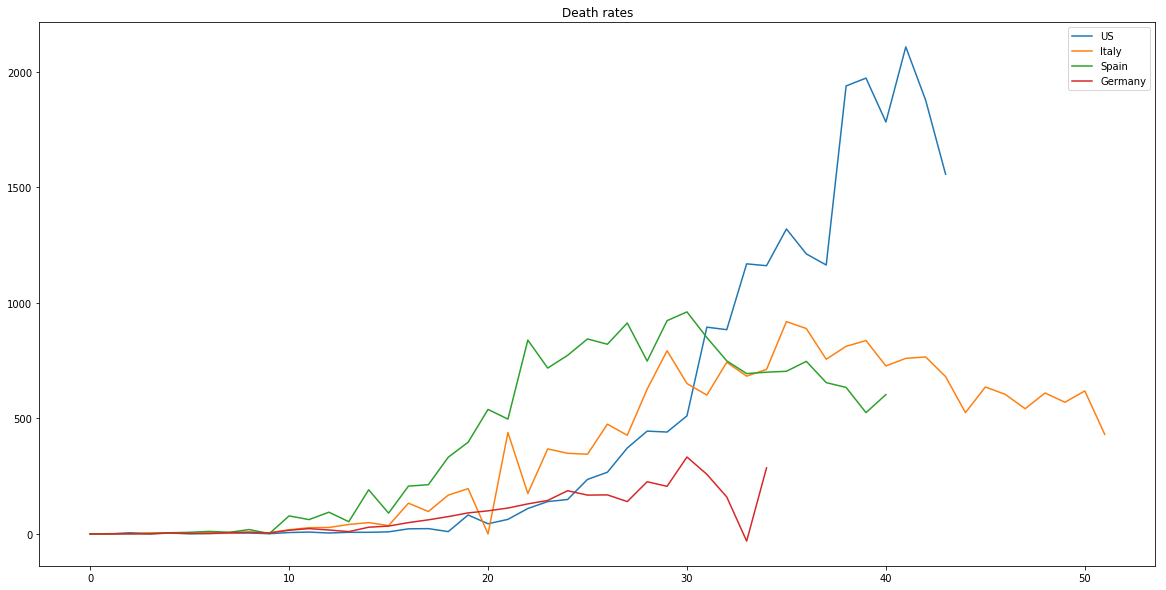

In [94]:
plt.title("Death rates")
plt.plot(USDeathDiff, label="US")
plt.plot(ItalyDeathDiff, label="Italy")
plt.plot(SpainDeathDiff, label="Spain")
plt.plot(GermanyDeathDiff, label="Germany")
plt.legend()
plt.show()

#### Here we illustrate the rate of the deaths per these 4 countries. The US is leading in these numbers while Italy, Spain and Germany perform overall the same.